# Easy visa - Problem statement

* Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

* Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help shortlist candidates with higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)


from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


# Reading the dataset

In [2]:
data=pd.read_csv("EasyVisa.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

# Overview of the dataset
# Displaying the first 5 rows of the dataset

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Checking the shape of the dataset

In [ ]:
df.shape

(25480, 12)

* There are 25480 rows and 12 columns in the given dataset.
# Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# finding the number of missing values
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


* There are no missing values in data.

## Number of unique values in each column

In [ ]:
df.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


* We can drop 'case_id' column as it is an ID variable and will not add value to the model.
* checking for the duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['case_status'].value_counts()

,count
case_status,
Certified,17018
Denied,8462


# Statistical summary of the dataset

In [ ]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Exploratory data analysis

# Univariate Analysis

In [ ]:
# Summarize categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n")
    print(data[col].value_counts())

Value counts for case_id:

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
Value counts for continent:

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
Value counts for education_of_employee:

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
Value counts for has_job_experience:

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
Value counts for requires_job_training:

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
Value counts for region_of_employment:

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dty

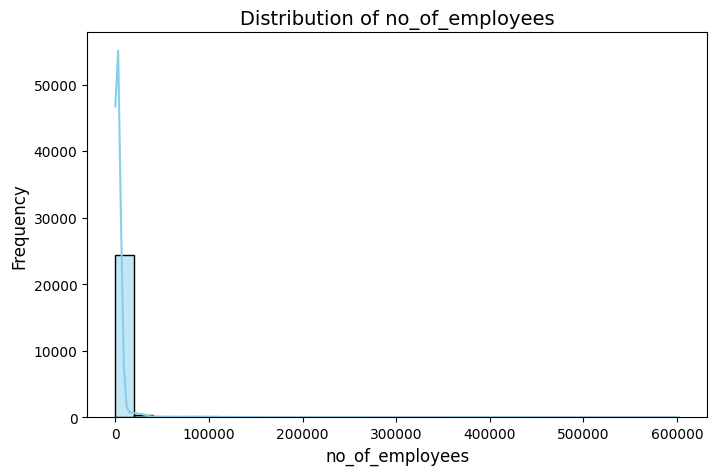

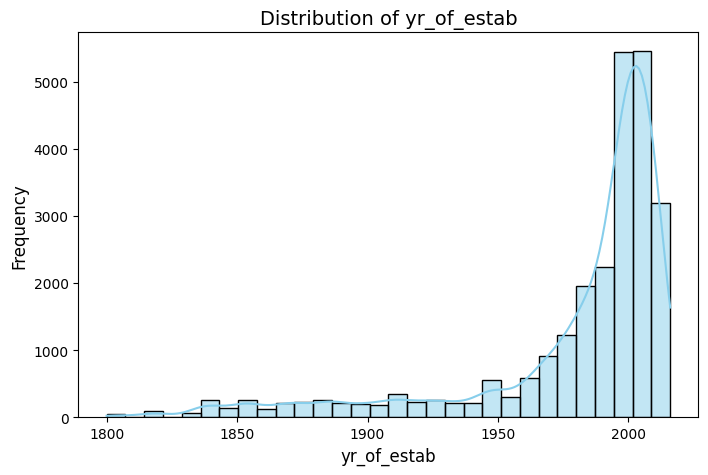

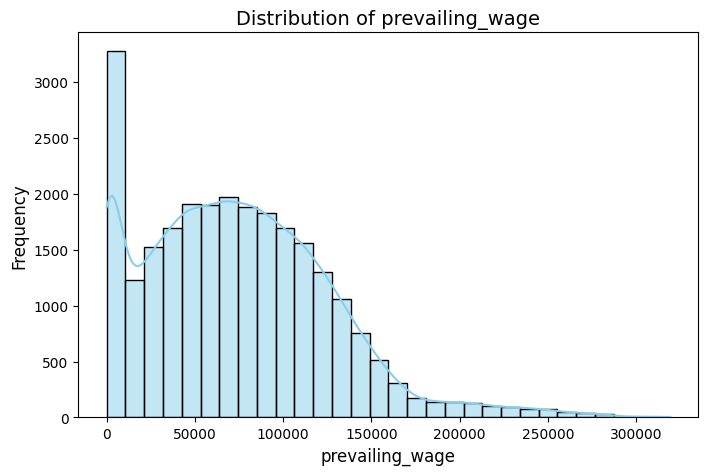

In [ ]:
# Univariate Analysis for Numerical Columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

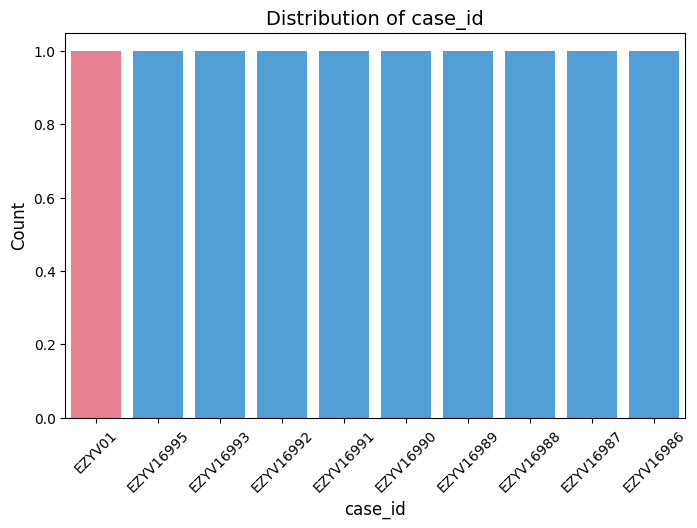

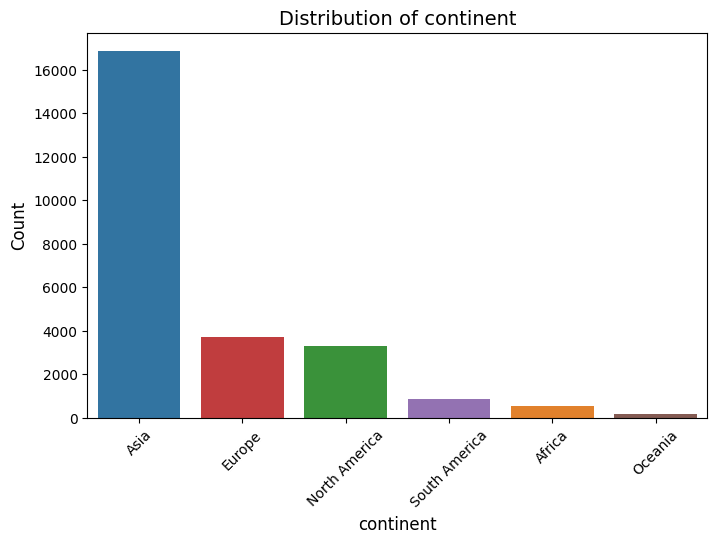

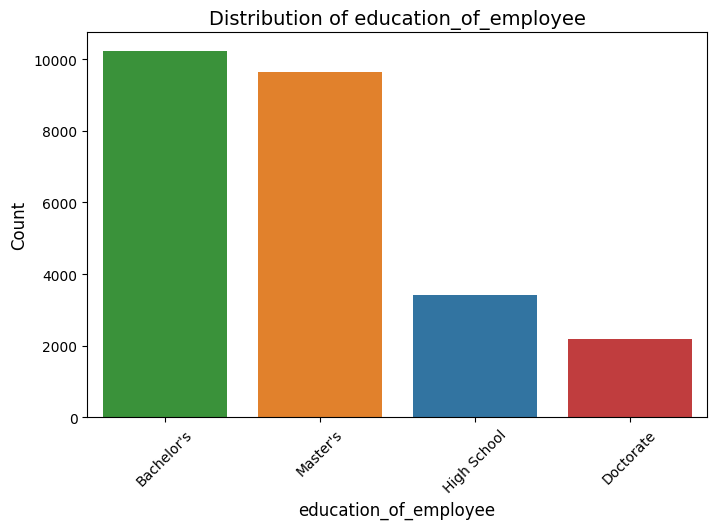

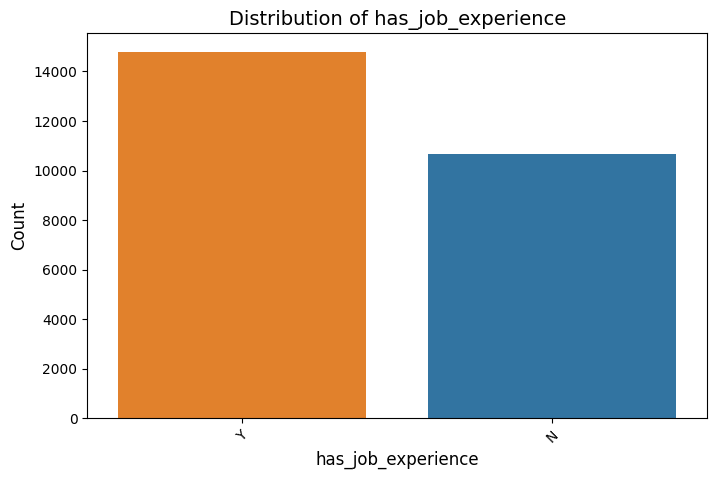

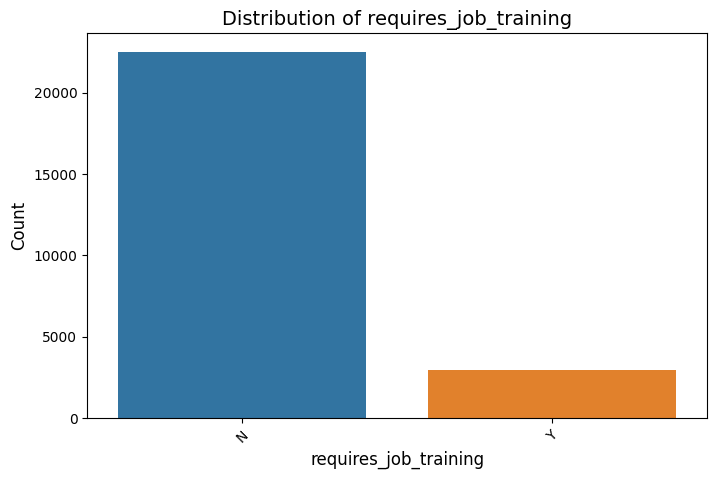

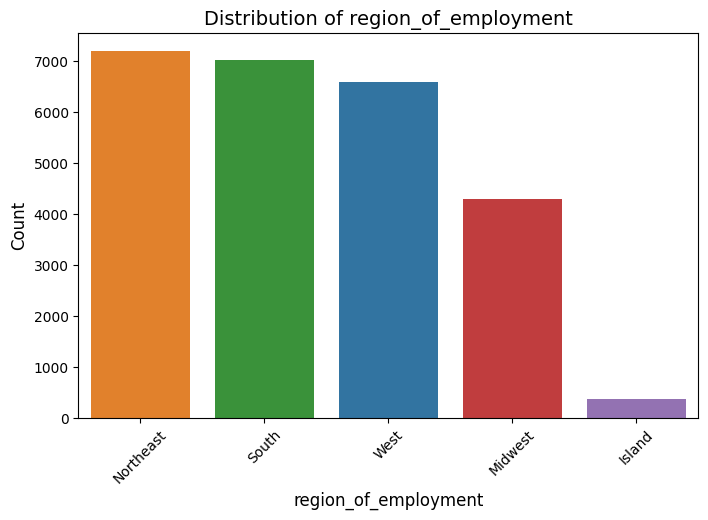

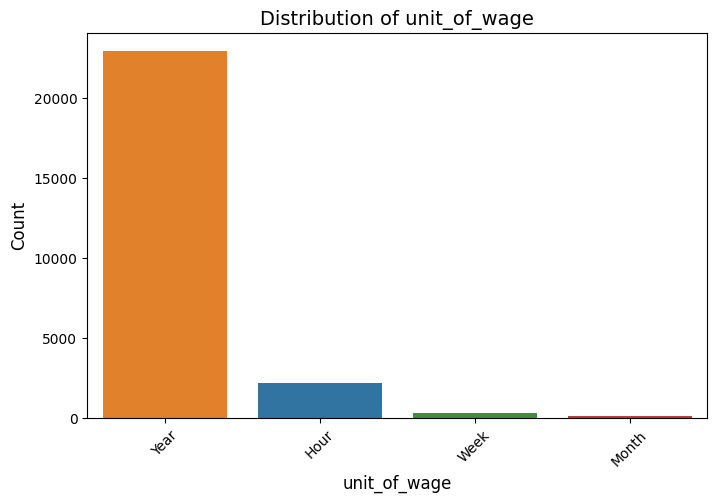

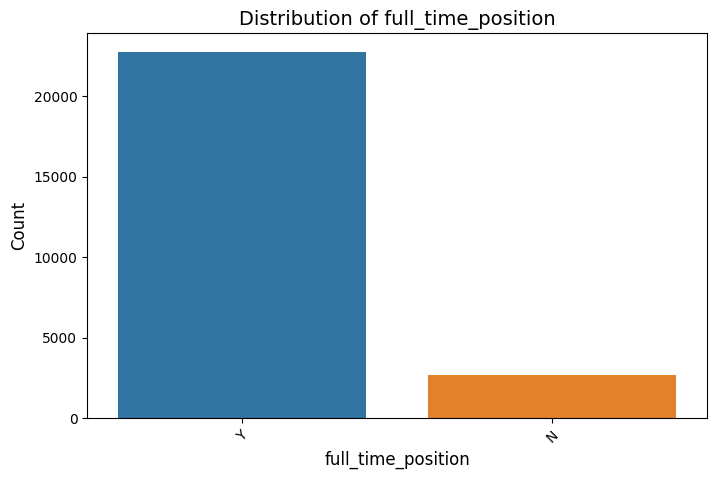

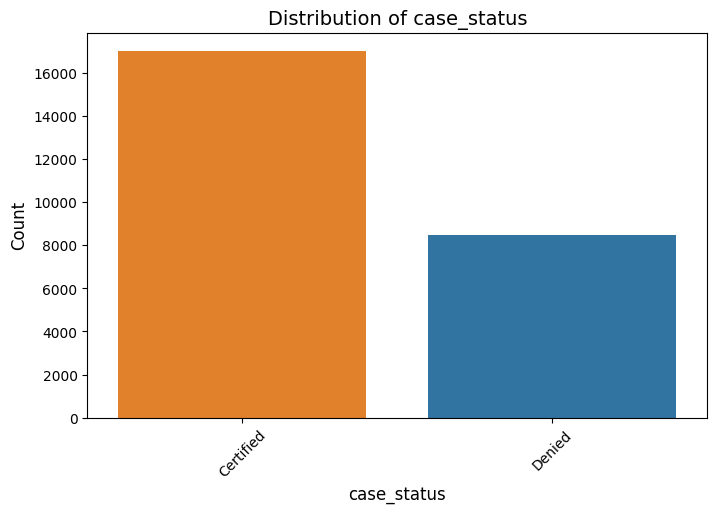

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    # Limit the number of categories to avoid overloading
    top_n_categories = data[col].value_counts().nlargest(10).index  # Adjust 10 to the desired number of categories
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=top_n_categories, hue=col, legend=False)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

* Most of the employees(around 16500) are from Asia continent
* Highest number of employees(above 10000) have the Bachelor's degree and  the second highest(nearer to 10000) have the Master's degree.
* most of the employess(Around 16000) employees have the job experience
* Least number of employees(around 2500) requires job training.
* Most of the employees are from Northeast, south and west regions.
* Most of the employeees are of fulltime position.
* visa is certified to around 17000 employees.
# Bivariate analysis

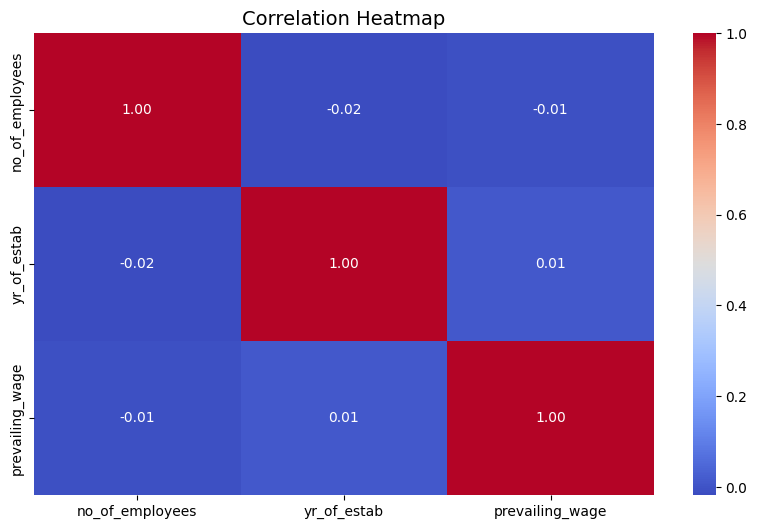

In [ ]:
# Correlation heatmap for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [ ]:
# Convert case_status to binary using replace
df['case_status_binary'] = df['case_status'].str.lower().replace({'certified': 1, 'denied': 0})

In [ ]:
# 1. Categorical Variables vs. case_status
def plot_categorical_vs_target(df, categorical_column, target_column):
    """
    Plots the percentage of each category against the target variable.
    """
    plt.figure(figsize=(10, 6))
    category_counts = df.groupby(categorical_column)[target_column].mean().reset_index()
    sns.barplot(x=categorical_column, y=target_column, data=category_counts, palette="viridis")
    plt.title(f'{categorical_column} vs {target_column}')
    plt.ylabel('Proportion Certified')
    plt.xlabel(categorical_column)
    plt.xticks(rotation=45)
    plt.show()

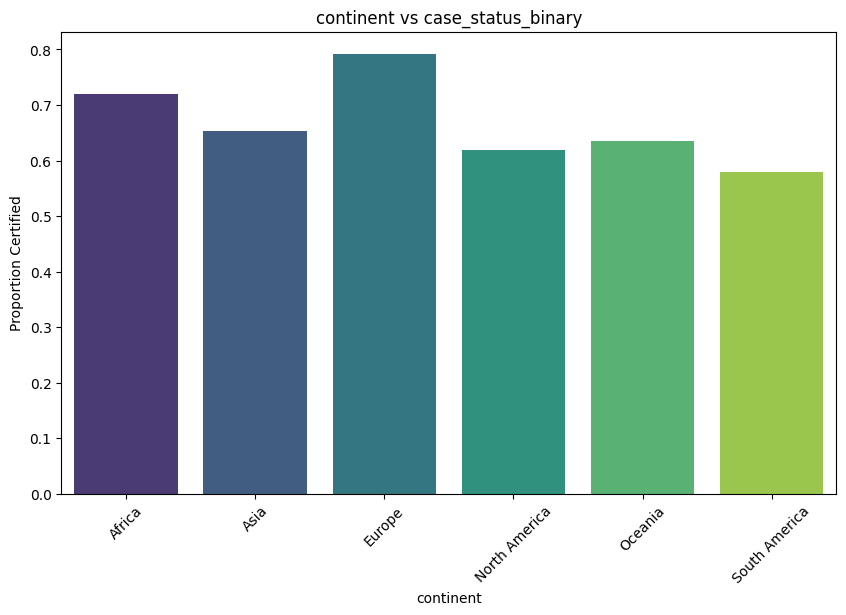

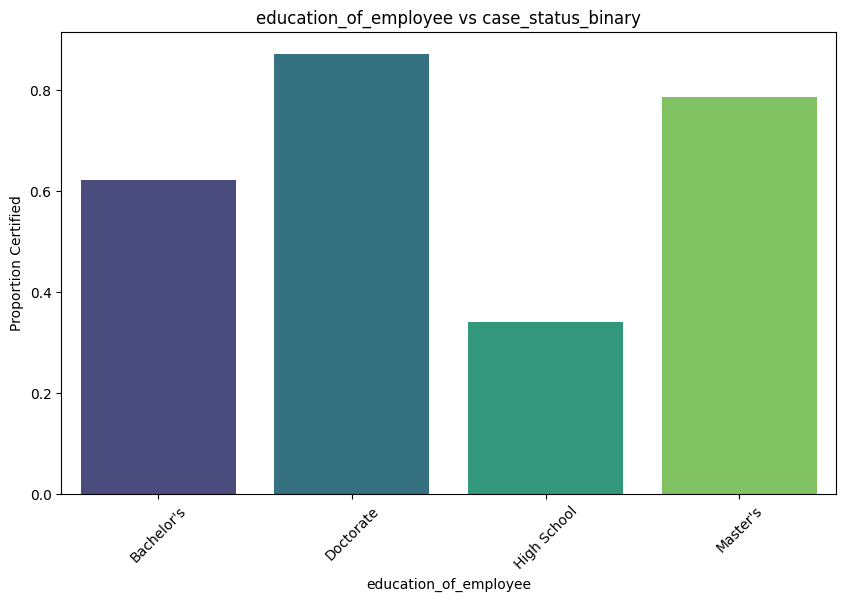

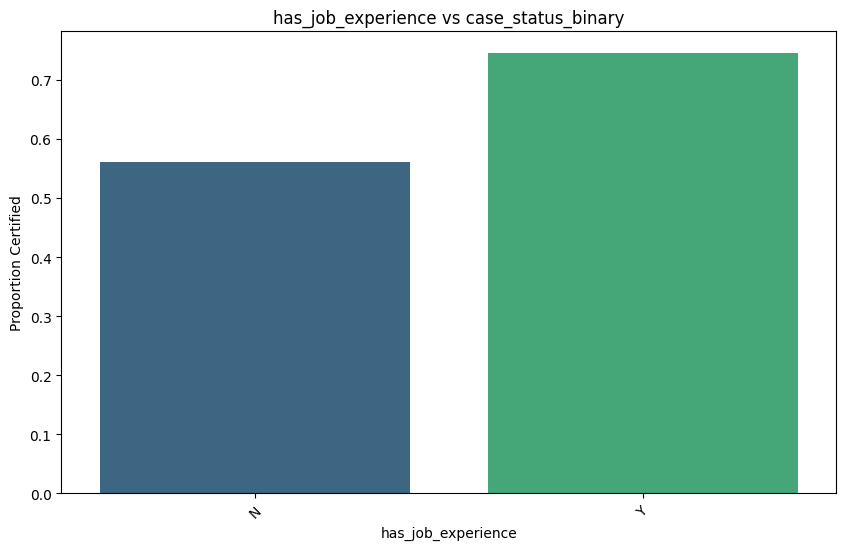

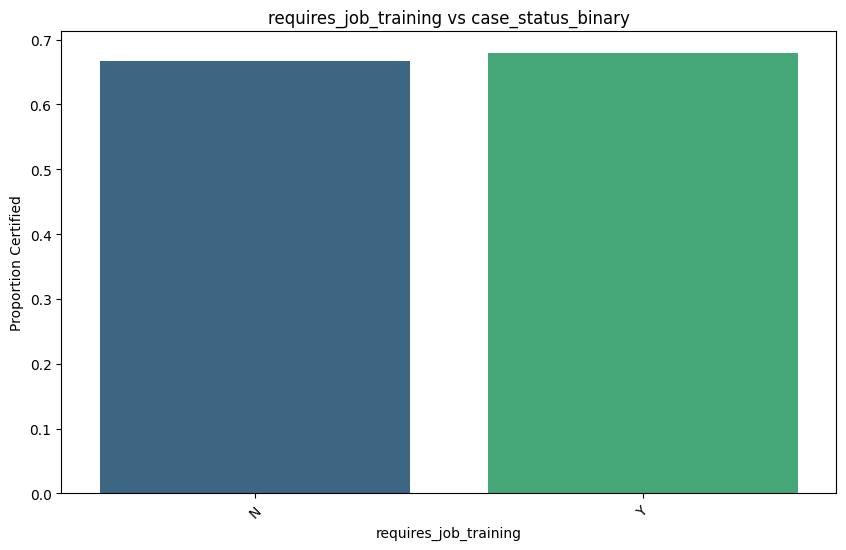

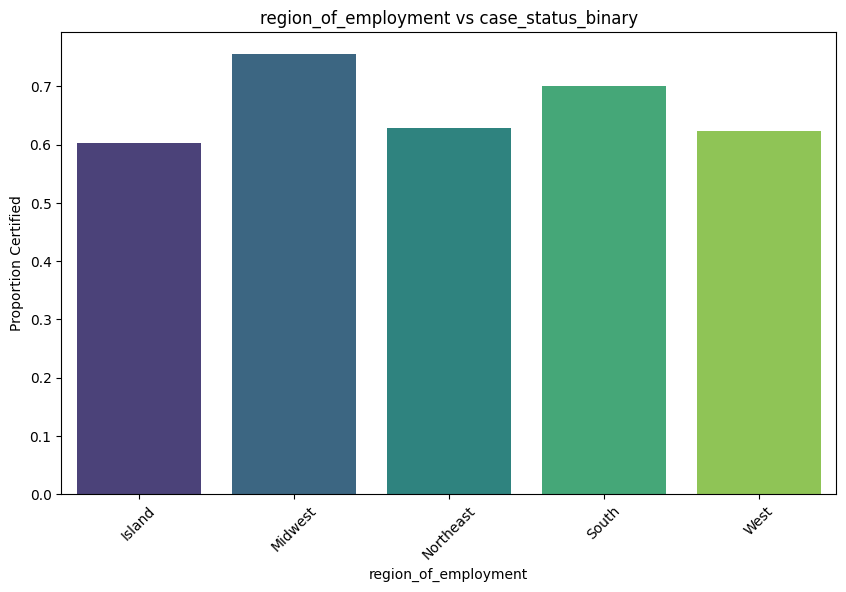

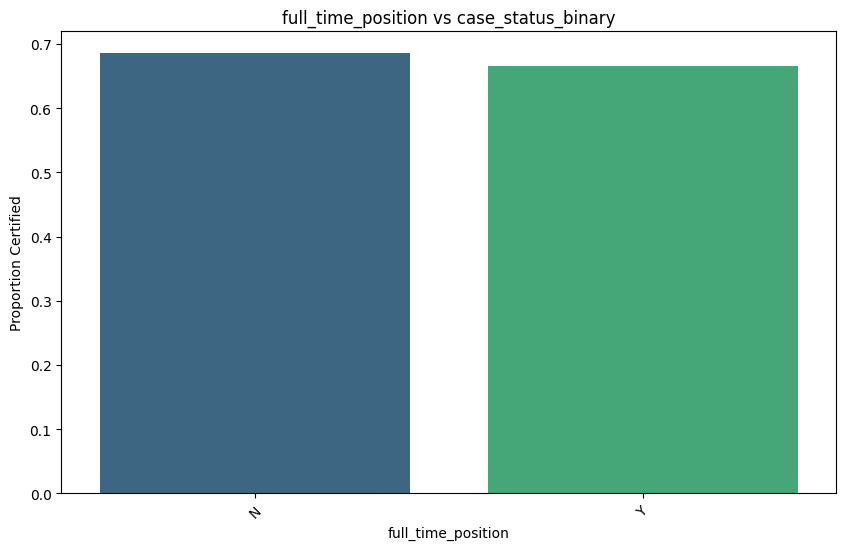

In [ ]:
# Plot for categorical variables
categorical_columns = [
    'continent', 'education_of_employee', 'has_job_experience',
    'requires_job_training', 'region_of_employment', 'full_time_position'
]
for column in categorical_columns:
    plot_categorical_vs_target(df, column, 'case_status_binary')

* Europe and Africa have a higher proportion of visa certifications compared to other coninents.
* Higher Education levels(Doctorates,Masters and Bachelors) are likely correlated with higher certification rates.So Educational qualifications play a significant role in visa approval decisions.
* Applicants with prior job experience are likely to have higher visa approval rates compared to those without prior job experience.
* Midwest and South regions have higher certification rates.

In [ ]:
# 2. Continuous Variables vs. case_status
def plot_continuous_vs_target(df, continuous_column, target_column):
    """
    Plots the distribution of a continuous variable against the target variable.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_column, y=continuous_column, data=df, palette="viridis")
    plt.title(f'{continuous_column} vs {target_column}')
    plt.ylabel(continuous_column)
    plt.xlabel(target_column)
    plt.show()

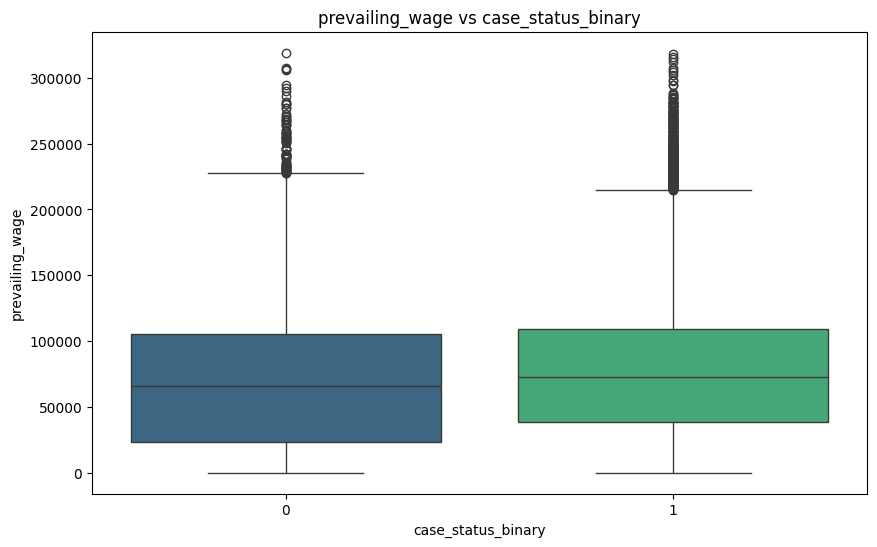

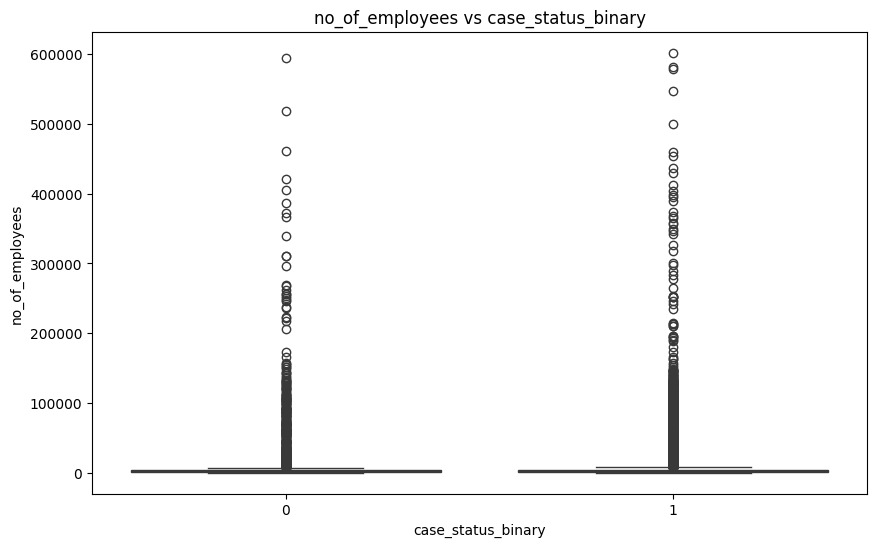

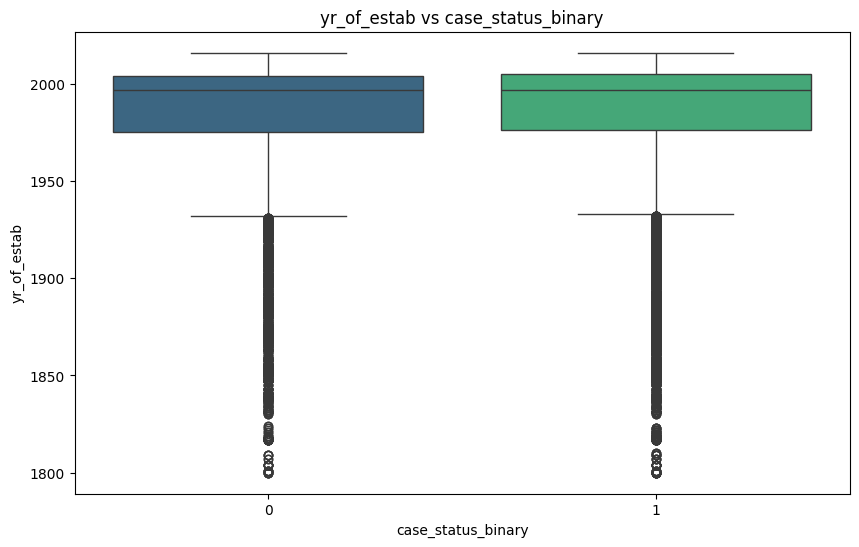

In [ ]:
# Continuous columns to analyze
continuous_columns = ['prevailing_wage', 'no_of_employees', 'yr_of_estab']
for column in continuous_columns:
    plot_continuous_vs_target(df, column, 'case_status_binary')

* Higher prevailing wages are often associated with higher certification rates.
* Larger companies with more employees are more likely to have higher visa certification rates.
* Older companies (established earlier) may have higher certification rates.
# EDA Questions:
# 1) Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

  education_of_employee  certification_rate
0            Bachelor's            0.622142
1             Doctorate            0.872263
2           High School            0.340351
3              Master's            0.786278


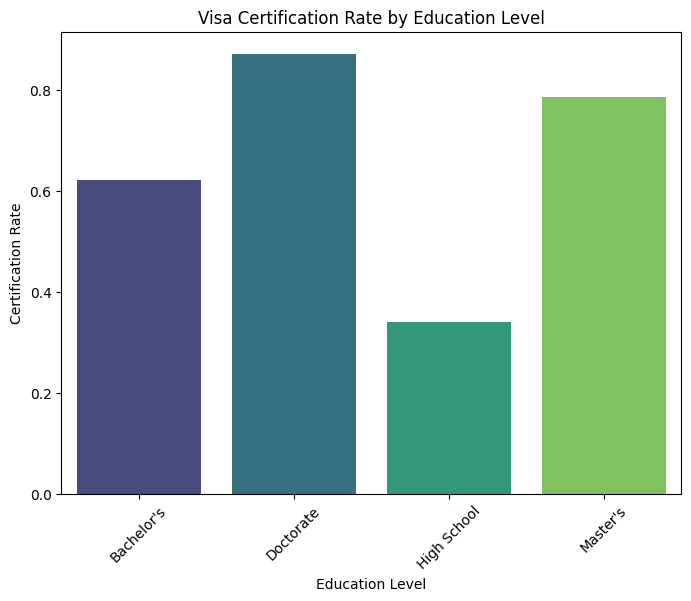

In [ ]:
# Grouping data by education and calculating certification rates
education_certification = df.groupby('education_of_employee')['case_status_binary'].mean().reset_index()
education_certification.rename(columns={'case_status_binary': 'certification_rate'}, inplace=True)

# Display the results
print(education_certification)

# Plotting the certification rate by education level
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='education_of_employee', y='certification_rate', data=education_certification, palette="viridis")
plt.title("Visa Certification Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Certification Rate")
plt.xticks(rotation=45)
plt.show()

* Higher education levels (Master’s or Ph.D.) are likely to show higher certification rates compared to lower education levels (High School or less).
# 2) How does the visa status vary across different continents?

Certification Rate by Continent:
       continent  certification_rate
0         Africa            0.720508
1           Asia            0.653105
2         Europe            0.792337
3  North America            0.618773
4        Oceania            0.635417
5  South America            0.578638

Application Counts by Continent and Case Status:
case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359


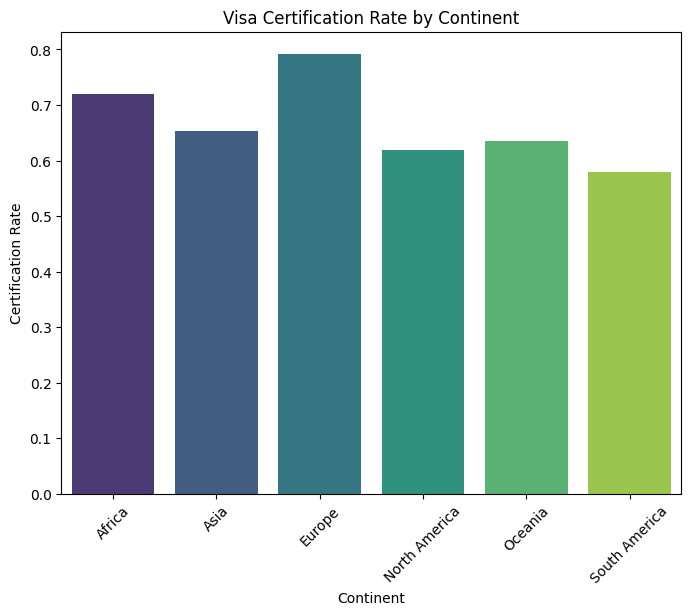

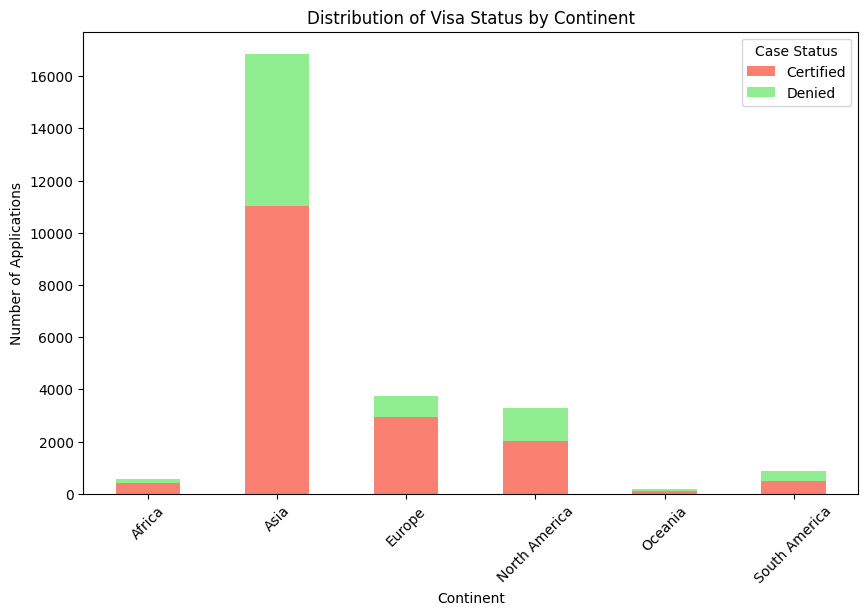

In [ ]:
# Grouping data by continent and calculating certification rates
continent_certification = df.groupby('continent')['case_status_binary'].mean().reset_index()
continent_certification.rename(columns={'case_status_binary': 'certification_rate'}, inplace=True)

# Counting total applications by continent and case_status
continent_counts = data.groupby(['continent', 'case_status'])['case_id'].count().unstack().fillna(0)

# Displaying results
print("Certification Rate by Continent:")
print(continent_certification)
print("\nApplication Counts by Continent and Case Status:")
print(continent_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x='continent', y='certification_rate', data=continent_certification, palette="viridis")
plt.title("Visa Certification Rate by Continent")
plt.xlabel("Continent")
plt.ylabel("Certification Rate")
plt.xticks(rotation=45)
plt.show()

# Visualization: Stacked Bar Chart of Certified vs Denied by Continent
continent_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightgreen'])
plt.title("Distribution of Visa Status by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Applications")
plt.legend(title="Case Status")
plt.xticks(rotation=45)
plt.show()

* applicants from Asia or Europe may have higher rates. So visa certification vary across different continents.
# 3) Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

Certification Rate by Job Experience:
  has_job_experience  certification_rate
0                  N            0.561341
1                  Y            0.744764

Application Counts by Job Experience and Case Status:
case_status         Certified  Denied
has_job_experience                   
N                        5994    4684
Y                       11024    3778


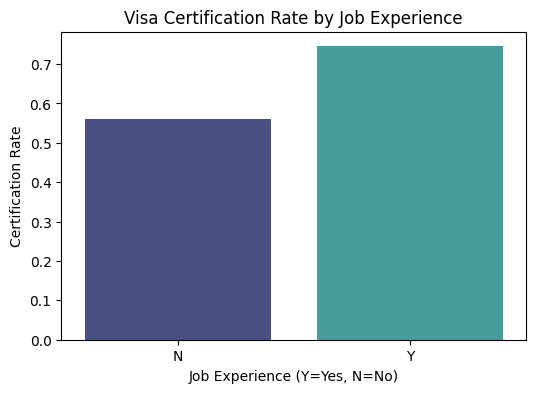

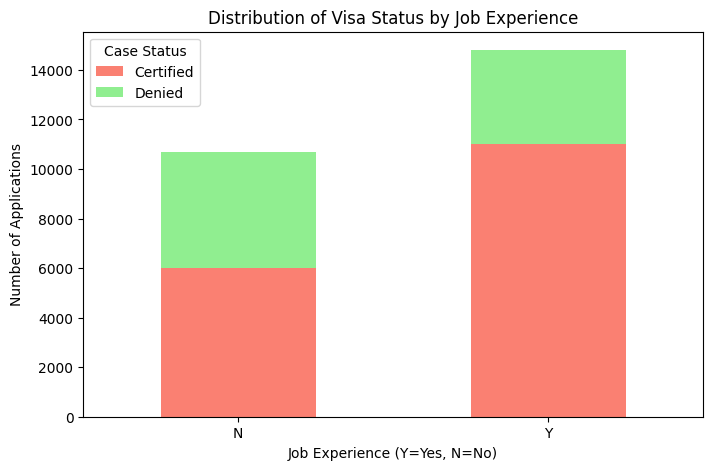

In [ ]:
# Grouping data by job experience and calculating certification rates
experience_certification = df.groupby('has_job_experience')['case_status_binary'].mean().reset_index()
experience_certification.rename(columns={'case_status_binary': 'certification_rate'}, inplace=True)

# Counting total applications by job experience and case status
experience_counts = df.groupby(['has_job_experience', 'case_status'])['case_id'].count().unstack().fillna(0)

# Displaying results
print("Certification Rate by Job Experience:")
print(experience_certification)
print("\nApplication Counts by Job Experience and Case Status:")
print(experience_counts)

# Visualization: Certification Rate by Job Experience


plt.figure(figsize=(6, 4))
sns.barplot(x='has_job_experience', y='certification_rate', data=experience_certification, palette="mako")
plt.title("Visa Certification Rate by Job Experience")
plt.xlabel("Job Experience (Y=Yes, N=No)")
plt.ylabel("Certification Rate")
plt.show()

# Visualization: Stacked Bar Chart of Certified vs Denied by Job Experience
experience_counts.plot(kind='bar', stacked=True, figsize=(8, 5), color=['salmon', 'lightgreen'])
plt.title("Distribution of Visa Status by Job Experience")
plt.xlabel("Job Experience (Y=Yes, N=No)")
plt.ylabel("Number of Applications")
plt.legend(title="Case Status")
plt.xticks(rotation=0)
plt.show()

So the Work experience influence the visa status

# 4) In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

Certification Rate by Pay Unit:
  unit_of_wage  certification_rate
0         Hour            0.346314
1        Month            0.617978
2         Week            0.621324
3         Year            0.698850

Application Counts by Pay Unit and Case Status:
case_status   Certified  Denied
unit_of_wage                   
Hour                747    1410
Month                55      34
Week                169     103
Year              16047    6915


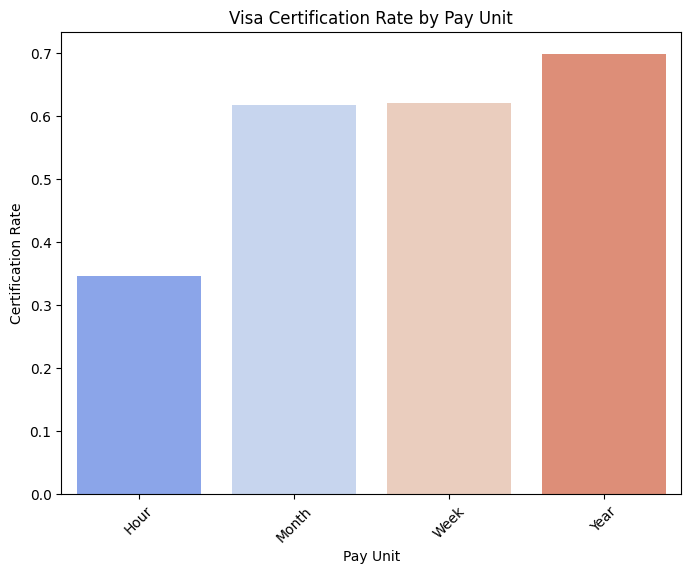

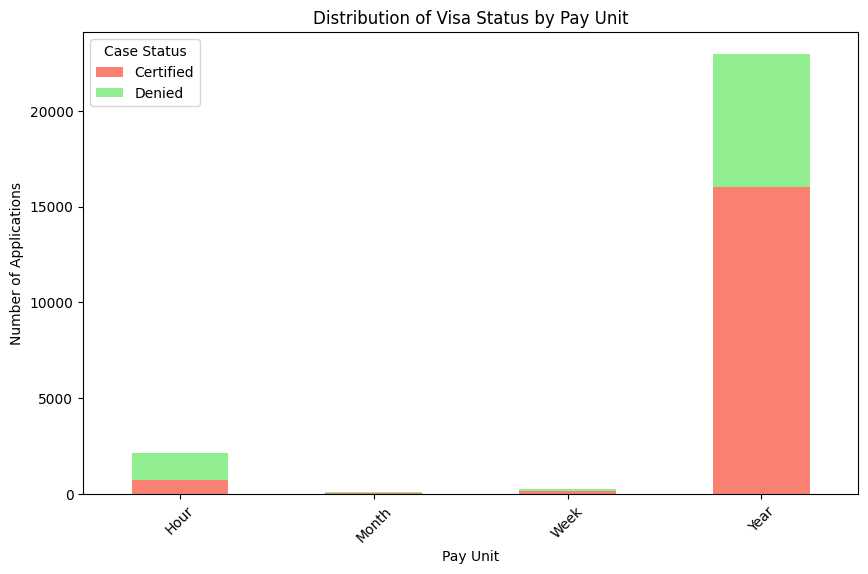

In [ ]:
# Grouping data by unit_of_wage and calculating certification rates
wage_certification = df.groupby('unit_of_wage')['case_status_binary'].mean().reset_index()
wage_certification.rename(columns={'case_status_binary': 'certification_rate'}, inplace=True)

# Counting total applications by pay unit and case status
wage_counts = df.groupby(['unit_of_wage', 'case_status'])['case_id'].count().unstack().fillna(0)

# Displaying results
print("Certification Rate by Pay Unit:")
print(wage_certification)
print("\nApplication Counts by Pay Unit and Case Status:")
print(wage_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x='unit_of_wage', y='certification_rate', data=wage_certification, palette="coolwarm")
plt.title("Visa Certification Rate by Pay Unit")
plt.xlabel("Pay Unit")
plt.ylabel("Certification Rate")
plt.xticks(rotation=45)
plt.show()

# Visualization: Stacked Bar Chart of Certified vs Denied by Pay Unit
wage_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightgreen'])
plt.title("Distribution of Visa Status by Pay Unit")
plt.xlabel("Pay Unit")
plt.ylabel("Number of Applications")
plt.legend(title="Case Status")
plt.xticks(rotation=45)
plt.show()

* Pay units like Yearly may have the highest certification rate.
# 5) The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

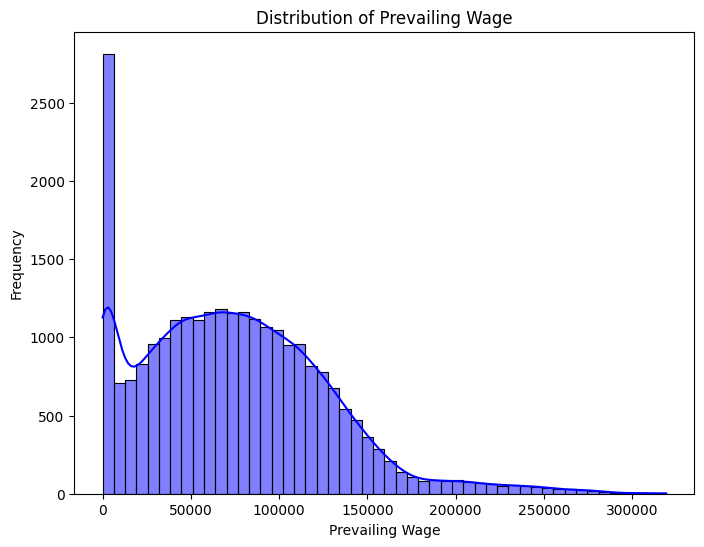

Certification Rate by Wage Category:
  wage_category  certification_rate
0           Low            0.608171
1        Medium            0.693789
2          High            0.690229
3     Very High            0.691085


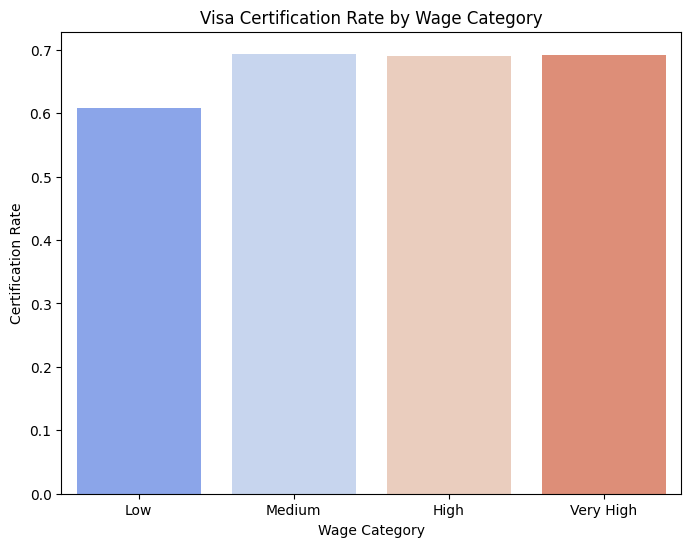

In [ ]:
# Visualize the distribution of prevailing wages
plt.figure(figsize=(8, 6))
sns.histplot(df['prevailing_wage'], kde=True, bins=50, color='blue')
plt.title('Distribution of Prevailing Wage')
plt.xlabel('Prevailing Wage')
plt.ylabel('Frequency')
plt.show()

# Categorize the prevailing wage into bins (low, medium, high)
bins = [0, 40000, 80000, 120000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
# Change 'data' to 'df' to add the 'wage_category' column to the correct DataFrame
df['wage_category'] = pd.cut(df['prevailing_wage'], bins=bins, labels=labels, right=False) # Changed data to df


# Group by wage category and calculate certification rates
wage_certification = df.groupby('wage_category')['case_status_binary'].mean().reset_index()
wage_certification.rename(columns={'case_status_binary': 'certification_rate'}, inplace=True)

# Display certification rates by wage category
print("Certification Rate by Wage Category:")
print(wage_certification)

# Plotting the certification rate by wage category
plt.figure(figsize=(8, 6))
sns.barplot(x='wage_category', y='certification_rate', data=wage_certification, palette='coolwarm')
plt.title("Visa Certification Rate by Wage Category")
plt.xlabel("Wage Category")
plt.ylabel("Certification Rate")
plt.show()



Higher prevailing wages (e.g., High or Very High) may be associated with higher visa certification rates.
# Outlier Detection and Treatment

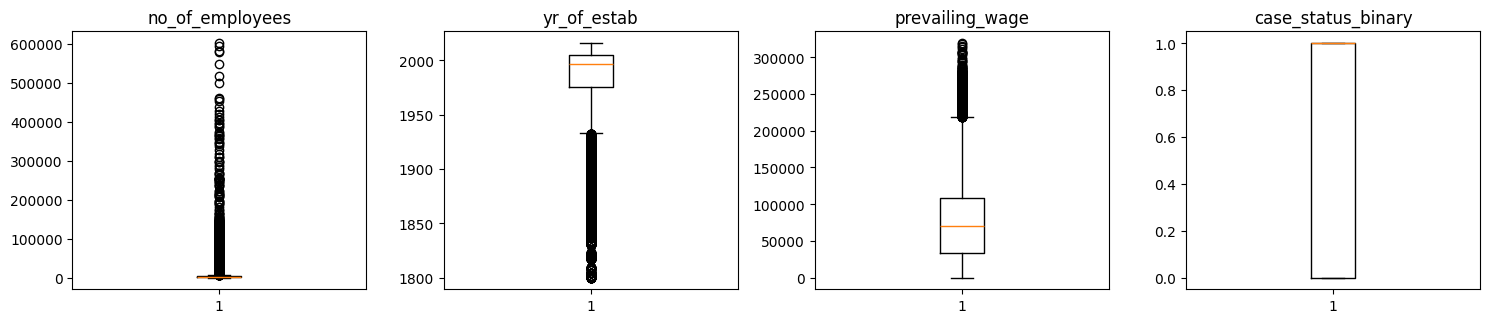

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.

# Split the data into train and test sets

In [4]:
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

In [5]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,no_of_employees,yr_of_estab,prevailing_wage,case_id_EZYV02,case_id_EZYV03,case_id_EZYV04,case_id_EZYV05,case_id_EZYV06,case_id_EZYV07,case_id_EZYV08,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513.0,2007.0,592.2029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2412.0,2002.0,83425.6500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,44444.0,2008.0,122996.8600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,98.0,1897.0,83434.0300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1082.0,2005.0,149907.3900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [6]:
# label encoding the response variable
y = y.map({'Certified': 1, 'Denied': 0})

y.head()

,case_status
0,0
1,1
2,0
3,0
4,1


In [7]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)


In [ ]:
print(f"Training Set Shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing Set Shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training Set Shape: X_train=(17836, 25500), y_train=(17836,)
Testing Set Shape: X_test=(7644, 25500), y_test=(7644,)


In [ ]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (17836, 25500)
Shape of test set: (7644, 25500) 

Percentage of classes in training set:
case_status
1    66.791882
0    33.208118
Name: proportion, dtype: float64 

Percentage of classes in test set:
case_status
1    66.784406
0    33.215594
Name: proportion, dtype: float64


# Model Building
# Decision Tree(Default)

In [49]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model Evaluation
We define a utility function to collate all the metrics into a single data frame, and another to plot the confusion matrix.

In [41]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [42]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

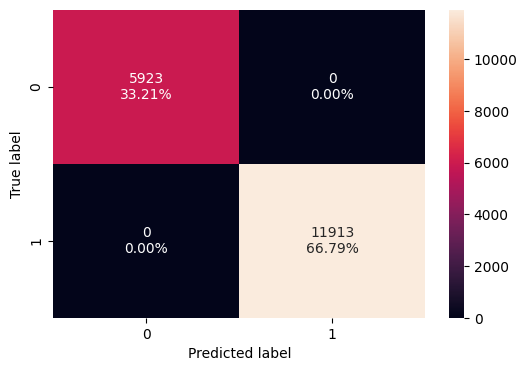

In [50]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [51]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


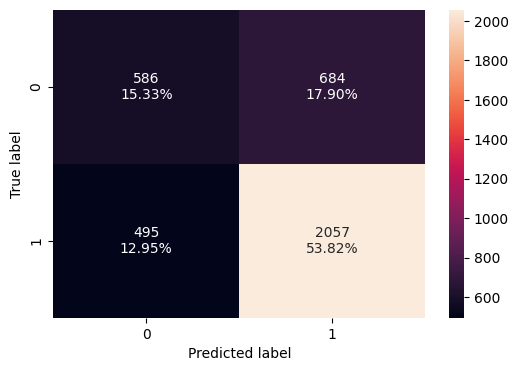

In [52]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [53]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.806034,0.750456,0.777253


* There is a huge difference between the training and test F1 Scores.
* This indicates that the model is overfitting.

## Visualizing the Decision Tree

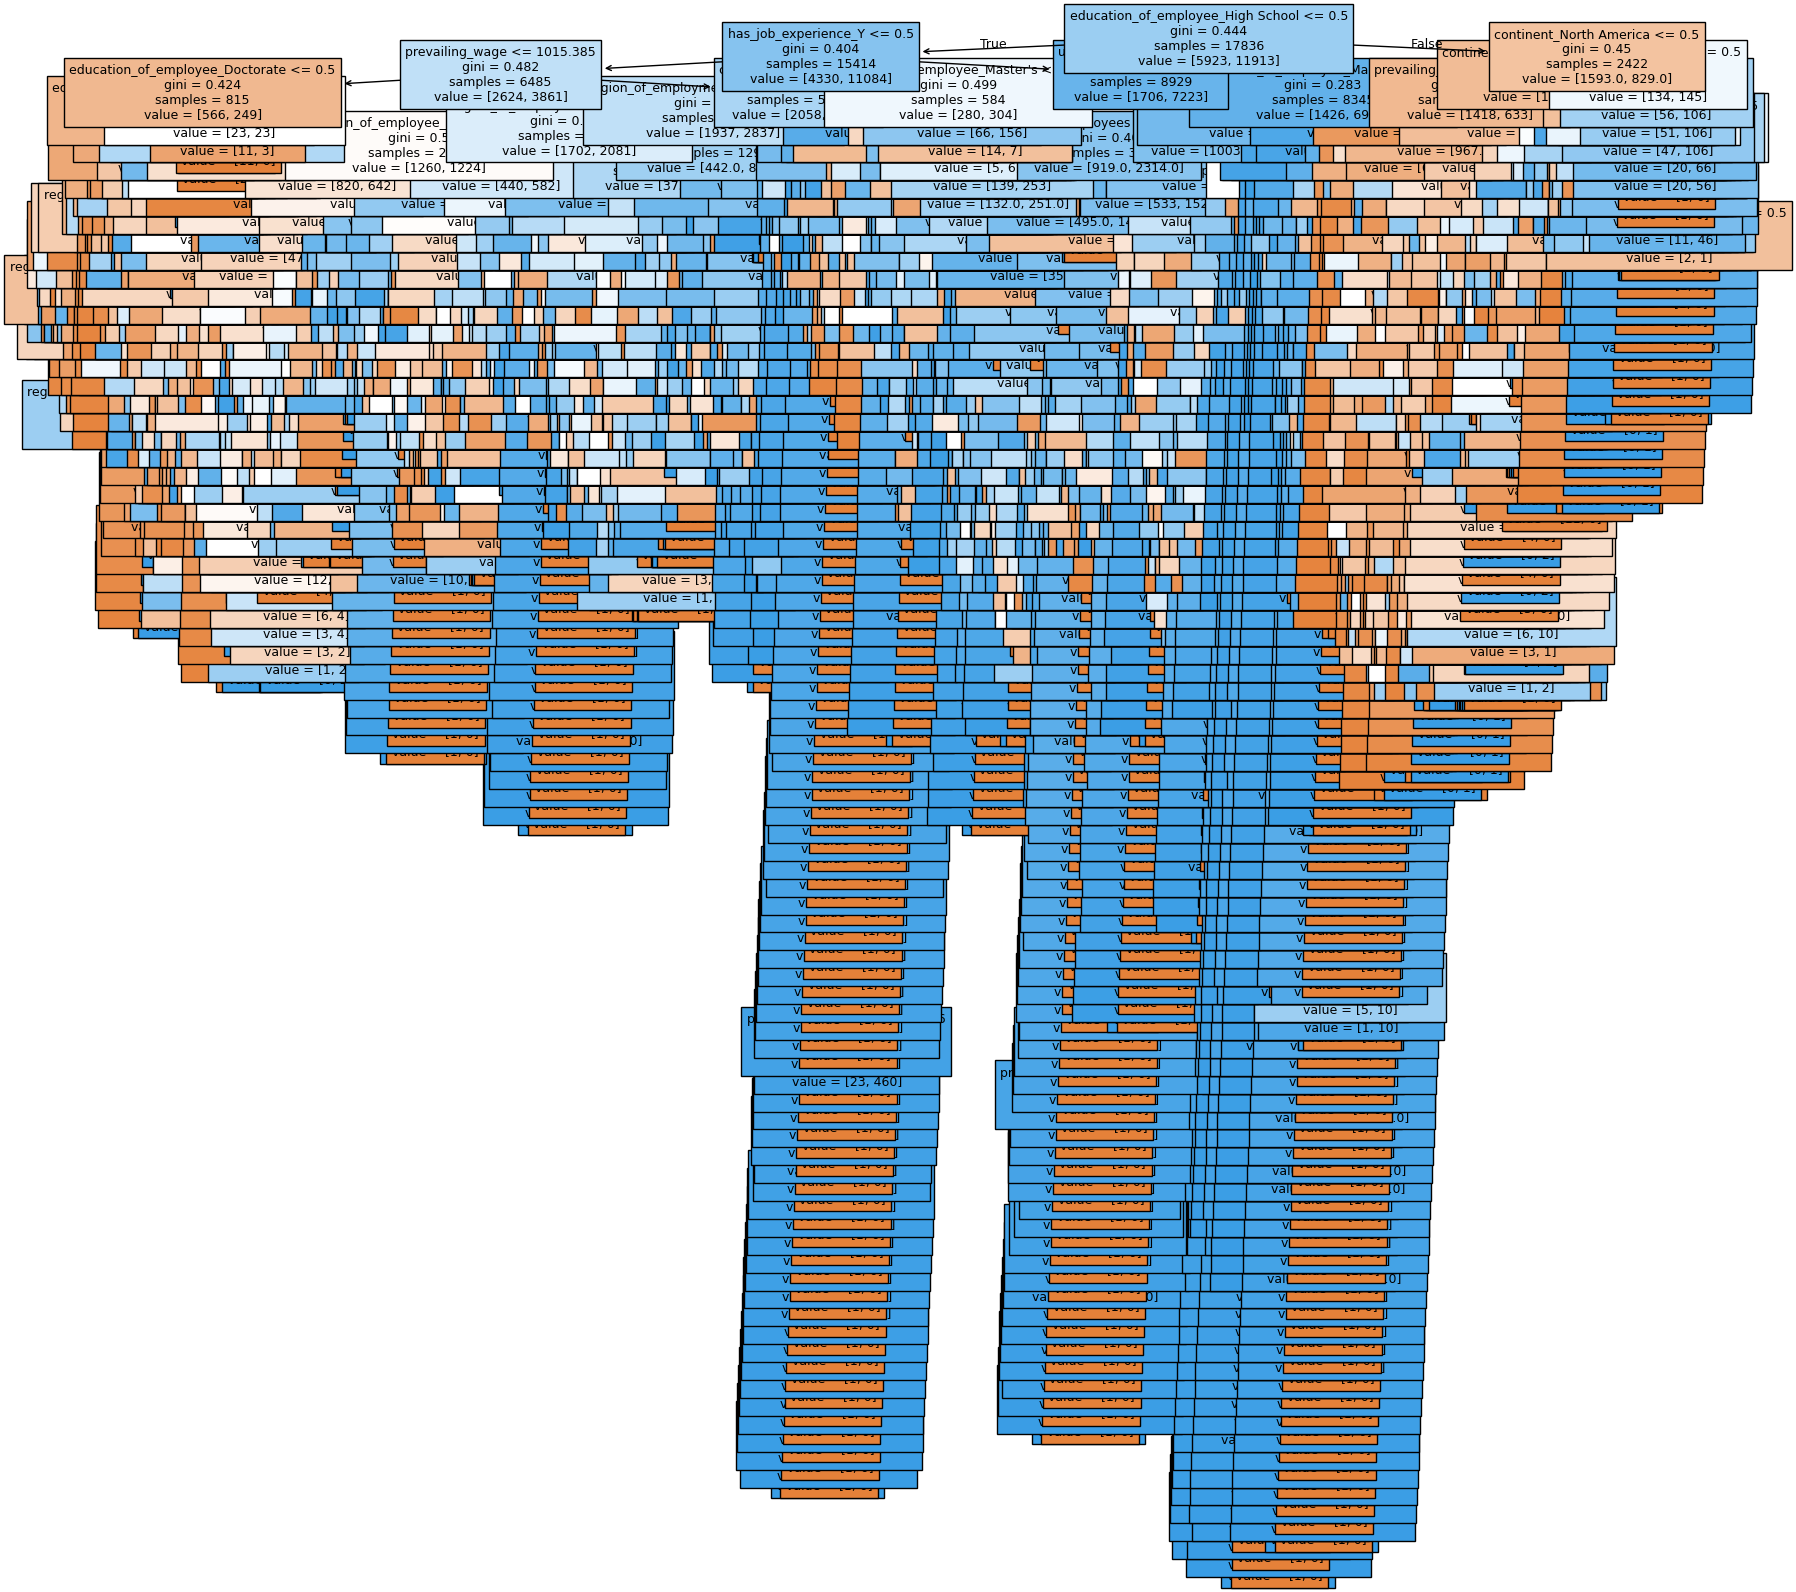

In [54]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

* We can observe that this is a very complex tree

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- prevailing_wage <= 1015.38
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |--- no_of_employees <= 44183.50
|   |   |   |   |   |   |--- region_of_employment_West <= 0.50
|   |   |   |   |   |   |   |--- prevailing_wage <= 648.16
|   |   |   |   |   |   |   |   |--- yr_of_estab <= 2010.50
|   |   |   |   |   |   |   |   |   |--- yr_of_estab <= 1975.00
|   |   |   |   |   |   |   |   |   |   |--- prevailing_wage <= 177.36
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- prevailing_wage >  177.36
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- yr_of_estab >  1975.00
|   |   |   |   |   |   |   |   |   |   |--- yr_of_estab <= 1991.00
|   |   |   |   |   |   |   |  

# Decision Tree (Pre-pruning)

In [58]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = np.arange(10, 51, 20)
min_samples_split_values = np.arange(10, 51, 20)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [59]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10, min_samples_split=10,
                       random_state=42)

## Model Evaluation

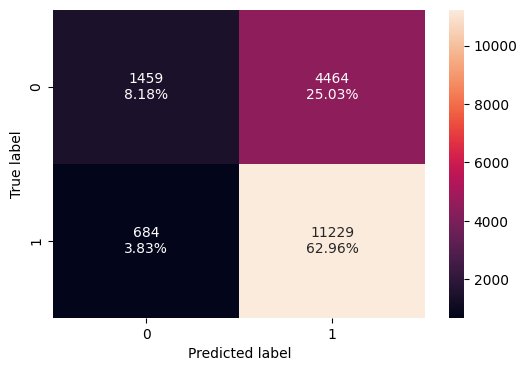

In [ ]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [ ]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.71137,0.942584,0.715542,0.813519


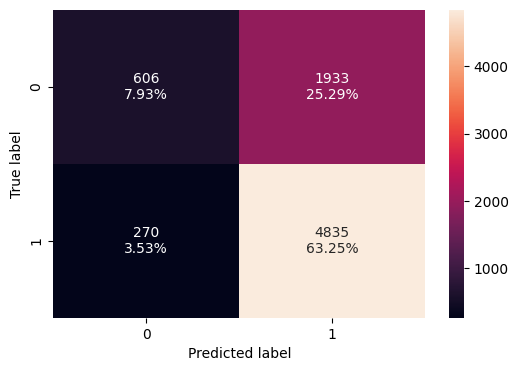

In [ ]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [63]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.709576,0.946317,0.71281,0.813131


*
The training and test scores are very close to each other, indicating a generalized performance.

# Visualizing the Decision Tree

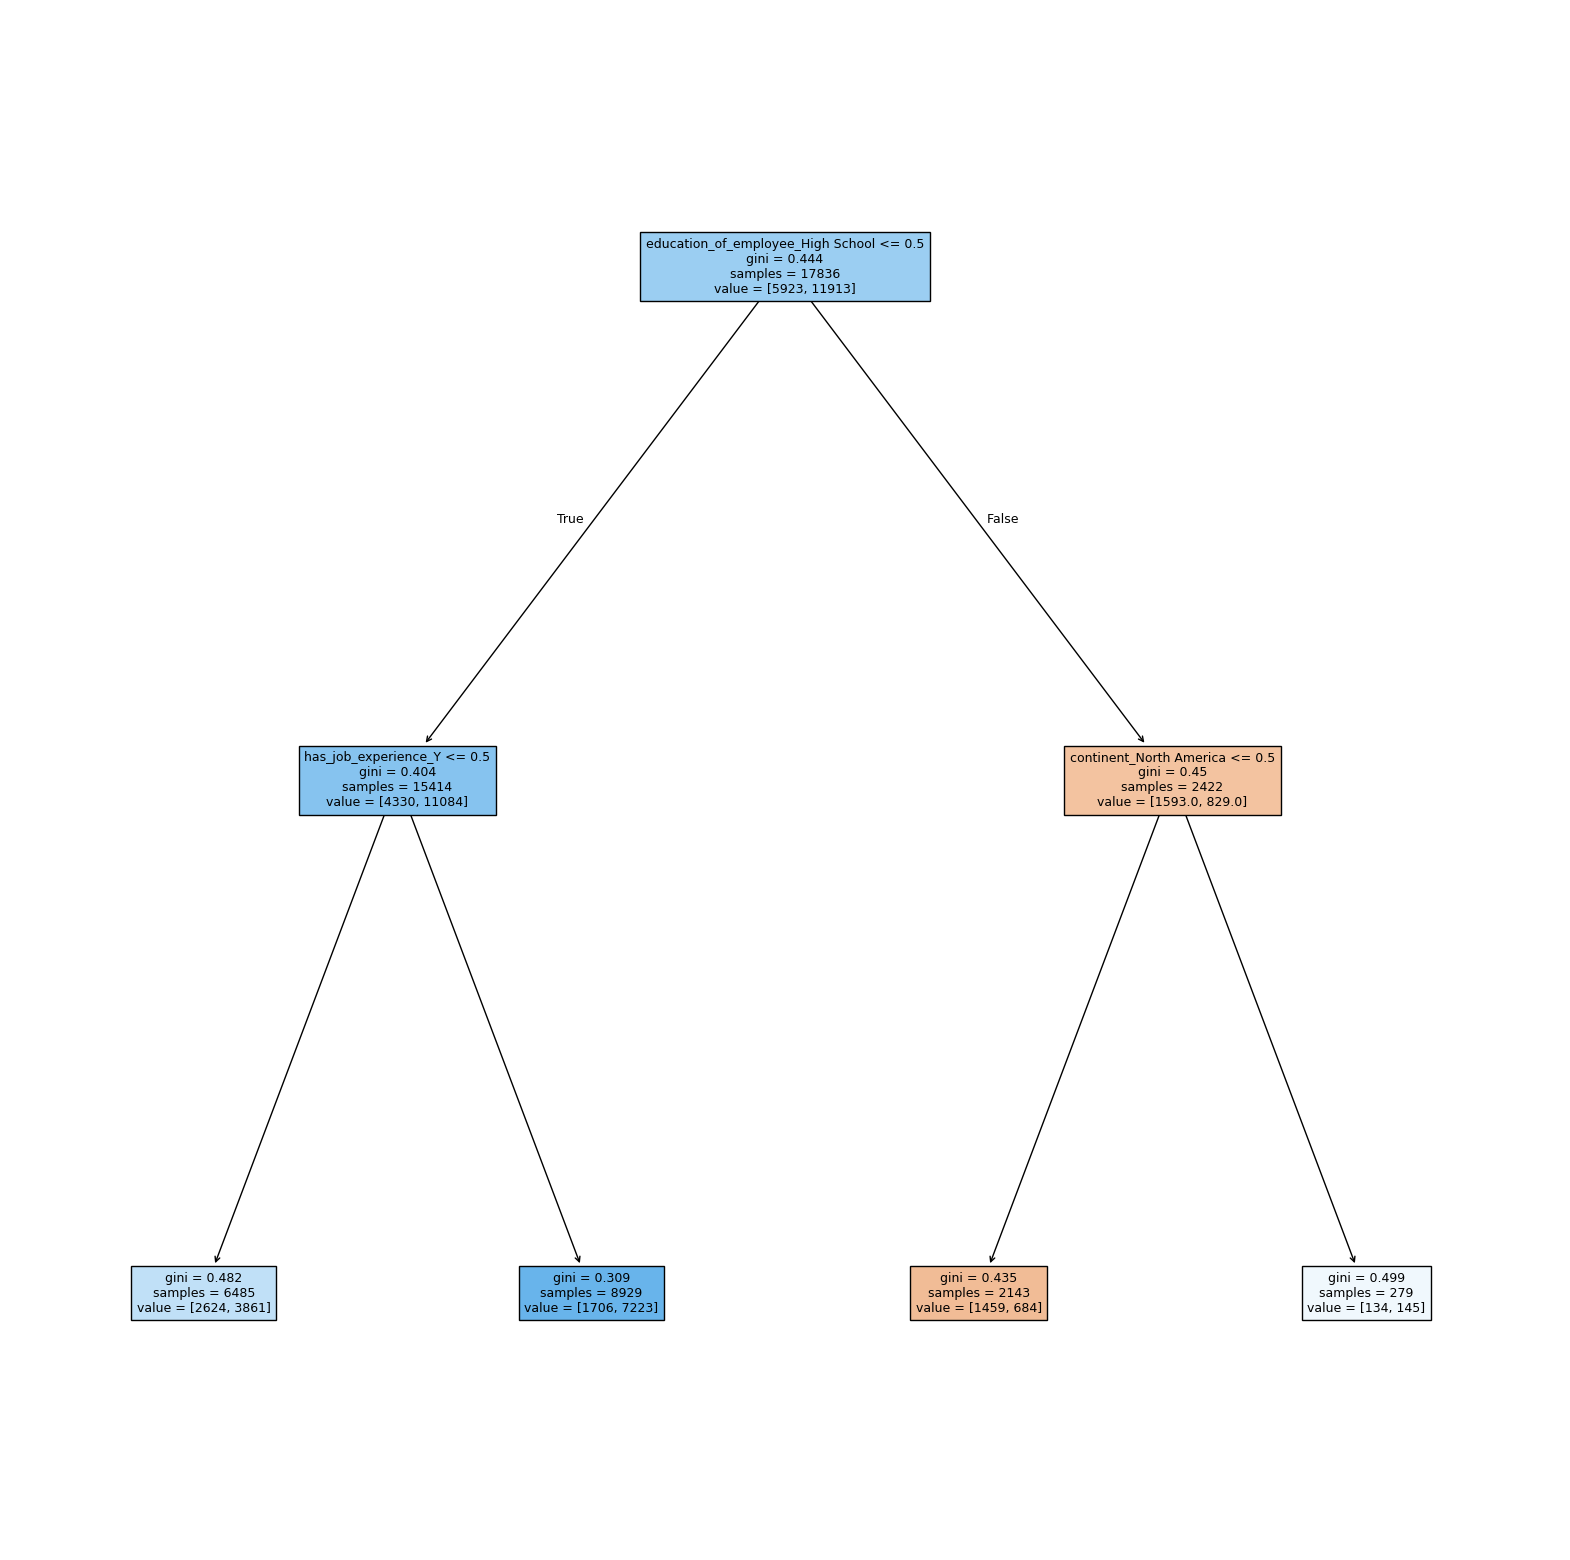

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

* This is a far less complex tree than the previous one.
* We can observe the decision rules much more clearly in the plot.

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- weights: [2624.00, 3861.00] class: 1
|   |--- has_job_experience_Y >  0.50
|   |   |--- weights: [1706.00, 7223.00] class: 1
|--- education_of_employee_High School >  0.50
|   |--- continent_North America <= 0.50
|   |   |--- weights: [1459.00, 684.00] class: 0
|   |--- continent_North America >  0.50
|   |   |--- weights: [134.00, 145.00] class: 1



# Decision Tree (Post-pruning)

In [8]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000054,0.000269
2,0.000058,0.000384
3,0.000061,0.000690
4,0.000062,0.001001
...,...,...
914,0.005827,0.376089
915,0.006199,0.382288
916,0.008782,0.391070
917,0.019212,0.410282


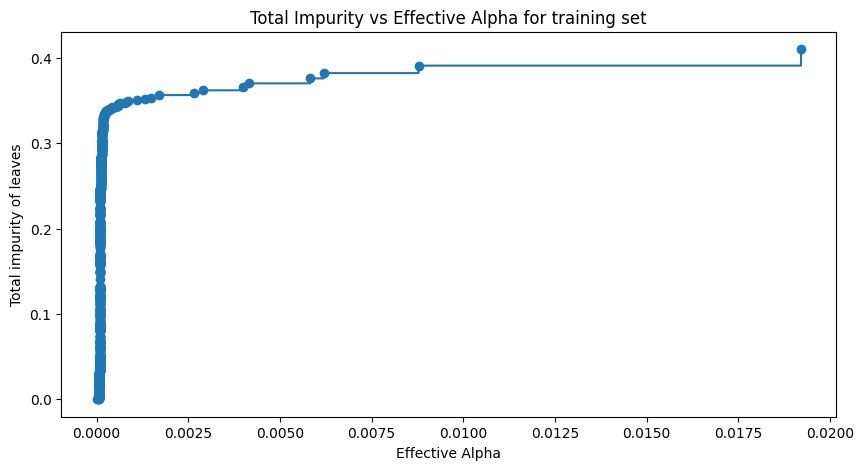

In [9]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

* Next, we train a decision tree using the effective alphas.

* The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the corresponding tree with one node.

In [18]:
!pip install scikit-learn

In [20]:
from sklearn.utils import resample
# Use subsampled data (optional for large datasets)
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=10000, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


# Coarse-to-fine search for ccp_alpha
coarse_alphas = np.linspace(min(ccp_alphas), max(ccp_alphas), 20)
validation_scores = []

for ccp_alpha in coarse_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)
    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=3, n_jobs=-1)
    validation_scores.append(np.mean(val_scores))

# Narrow down the range for a finer search, ensuring non-negative values
best_alpha = coarse_alphas[np.argmax(validation_scores)]
fine_alphas = np.linspace(max(0, best_alpha - 0.01), best_alpha + 0.01, 10) # Ensure fine_alphas are non-negative

final_validation_scores = []
for ccp_alpha in fine_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)
    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=5, n_jobs=-1)
    final_validation_scores.append(np.mean(val_scores))

# Best alpha
best_alpha_index = np.argmax(final_validation_scores)
print("Best ccp_alpha:", fine_alphas[best_alpha_index])
print("Validation Score:", final_validation_scores[best_alpha_index])

Best ccp_alpha: 0.0
Validation Score: 0.7552000000000001


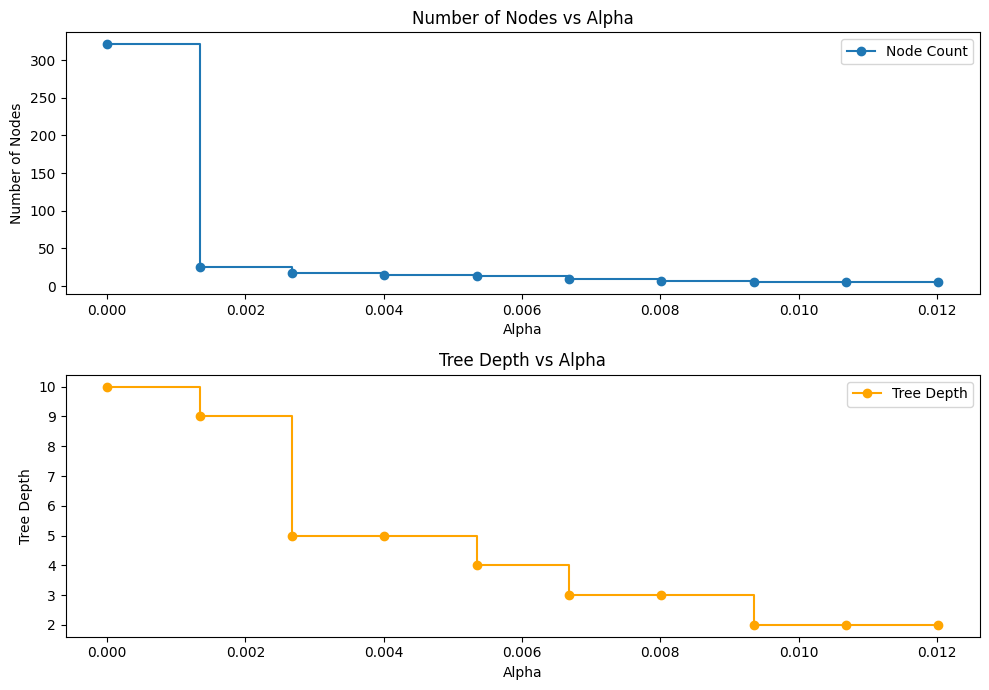

In [27]:


# Subsample the dataset to reduce size (if applicable)
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=5000, random_state=42)

# Preallocate lists to store results
validation_scores = []
node_counts = []
depths = []

# Use coarse-to-fine search for ccp_alphas
coarse_alphas = np.linspace(min(ccp_alphas), max(ccp_alphas), 20)

for ccp_alpha in coarse_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)

    # Use 3-fold cross-validation to evaluate validation scores
    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=3, n_jobs=-1)
    validation_scores.append(np.mean(val_scores))

    # Fit the classifier to extract tree properties
    clf.fit(X_train_sample, y_train_sample)
    node_counts.append(clf.tree_.node_count)
    depths.append(clf.tree_.max_depth)

# Refine the search using the best alpha from the coarse search
best_coarse_alpha = coarse_alphas[np.argmax(validation_scores)]
fine_alphas = np.linspace(max(0, best_coarse_alpha - 0.01), best_coarse_alpha + 0.01, 10)

# Clear previous results
validation_scores = []
node_counts = []
depths = []

for ccp_alpha in fine_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)

    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=3, n_jobs=-1)
    validation_scores.append(np.mean(val_scores))

    clf.fit(X_train_sample, y_train_sample)
    node_counts.append(clf.tree_.node_count)
    depths.append(clf.tree_.max_depth)

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot node counts
ax[0].plot(fine_alphas, node_counts, marker="o", drawstyle="steps-post", label="Node Count")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[0].legend()

# Plot tree depth
ax[1].plot(fine_alphas, depths, marker="o", drawstyle="steps-post", label="Tree Depth", color="orange")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree Depth")
ax[1].set_title("Tree Depth vs Alpha")
ax[1].legend()

fig.tight_layout()
plt.show()


In [28]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [29]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

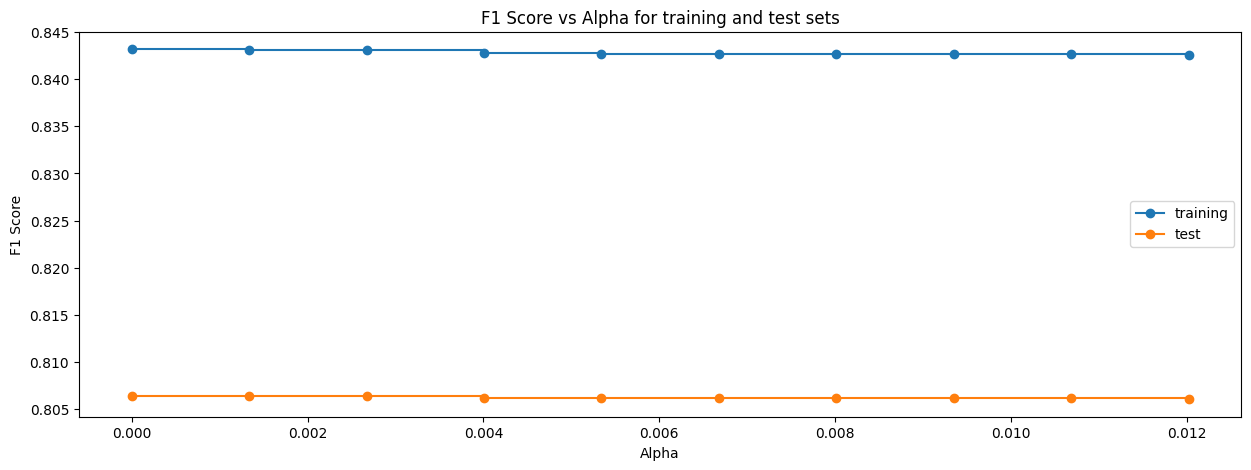

In [35]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Ensure both arrays have the same length for plotting
# Assuming 'clfs' was created with 'fine_alphas' or a similar list of alphas:
# Use the same alphas used to generate train_f1_scores and test_f1_scores
plot_alphas = fine_alphas # or plot_alphas = coarse_alphas, whichever was used to create 'clfs'

# If train_f1_scores and test_f1_scores have more elements than plot_alphas, truncate them:
train_f1_scores = train_f1_scores[:len(plot_alphas)]
test_f1_scores = test_f1_scores[:len(plot_alphas)]

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(plot_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(plot_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [36]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=5.766827924262325e-05, max_depth=10,
                       random_state=42)


# Model Evaluation

In [38]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

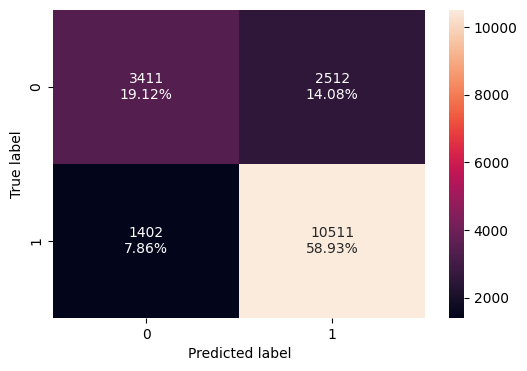

In [39]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [43]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.780556,0.882313,0.80711,0.843038


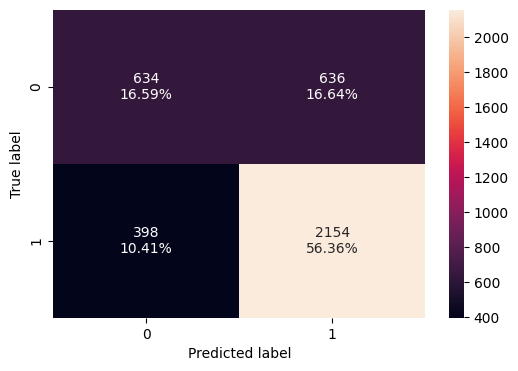

In [44]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [45]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.729461,0.844044,0.772043,0.80644


# Visualizing Decision Tree

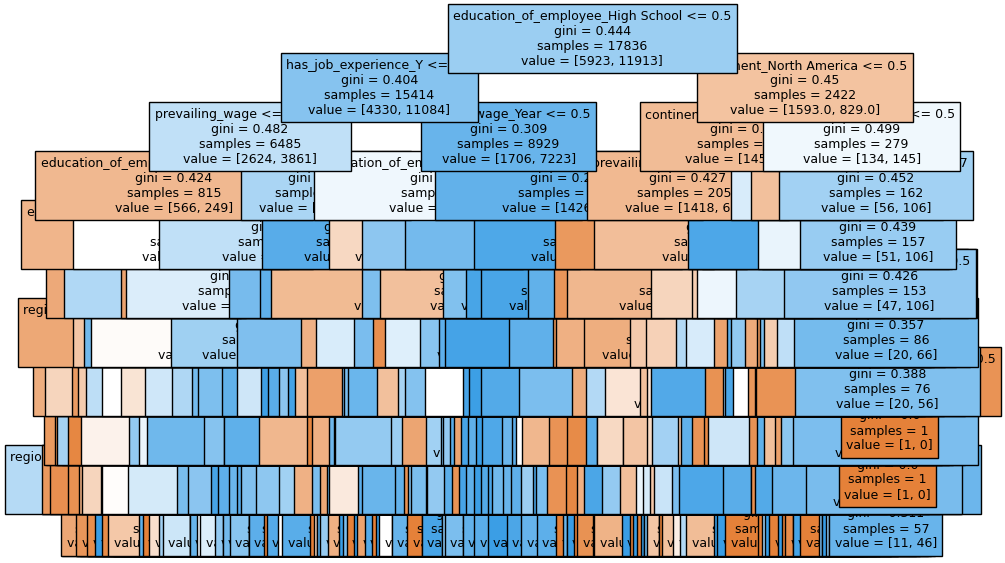

In [46]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

* this is also a complex tree

In [47]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- prevailing_wage <= 1015.38
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |--- no_of_employees <= 44183.50
|   |   |   |   |   |   |--- region_of_employment_West <= 0.50
|   |   |   |   |   |   |   |--- prevailing_wage <= 648.16
|   |   |   |   |   |   |   |   |--- yr_of_estab <= 2010.50
|   |   |   |   |   |   |   |   |   |--- yr_of_estab <= 1975.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [39.00, 26.00] class: 0
|   |   |   |   |   |   |   |   |   |--- yr_of_estab >  1975.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [141.00, 43.00] class: 0
|   |   |   |   |   |   |   |   |--- yr_of_estab >  2010.50
|   |   |   |   |   |   |   |   |   |--- region_of_employment_South <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   | 

In [61]:
# Calculating dtree2_train_perf before using it:
dtree2_train_perf = model_performance_classification(dtree2, X_train, y_train)
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.711370,0.780556
Recall,1.0,0.942584,0.882313
Precision,1.0,0.715542,0.807110
F1,1.0,0.813519,0.843038


In [64]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.691523,0.709576,0.729461
Recall,0.806034,0.946317,0.844044
Precision,0.750456,0.712810,0.772043
F1,0.777253,0.813131,0.806440


* Both the pre-pruned and post-pruned decision trees exhibit generalized performances.

* Overfitting in Default Tree: The default decision tree (without pruning) has perfect performance on the training set but significantly worse performance on the test set, which indicates overfitting.

* The pre-pruned decision tree outperforms the default tree on the test set, showing a significant improvement in generalization.

* Pre-pruning reduces the model's complexity by limiting how deep the tree can grow, leading to better balance between training performance and test performance.

* It is less prone to overfitting and achieves better recall and F1 score compared to the default model.

* The post-pruned tree has the worst performance overall. It seems to underfit the data, as indicated by the relatively low accuracy and F1 score on the training set and the test set.

* Although pruning reduces overfitting, the tree might be too simple to capture enough of the relevant patterns in the data, resulting in poor performance on both the training and test sets.

* Pre-pruning strikes a good balance, reducing overfitting while maintaining a reasonable level of accuracy and F1 score.

* Post-pruning, in this case, may have over-simplified the model, reducing its ability to perform well on both the training and test sets.

* Recommendation:
To avoid overfitting and achieve good generalization, pre-pruning seems to be a better approach in this case.

# AdaBoost Classifier

In [65]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [68]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score = model_performance_classification(abc, X_test, y_test)  # Assuming you want metrics on the test set
print(abc_score)

   Accuracy    Recall  Precision        F1
0  0.732601  0.885188   0.756024  0.815523


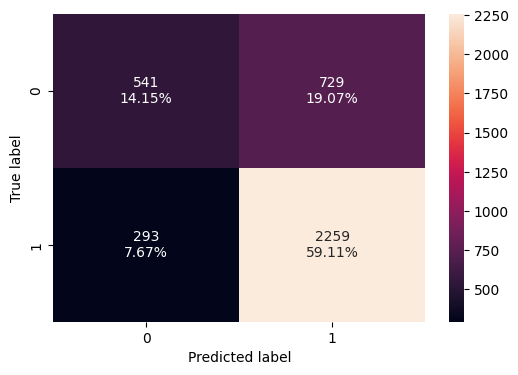

In [71]:
plot_confusion_matrix(abc,X_test, y_test)

# Gradient Boosting Classifier

In [72]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [77]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=model_performance_classification(gbc, X_test, y_test)
print(gbc_score)

   Accuracy    Recall  Precision        F1
0  0.744898  0.874608   0.773121  0.820739


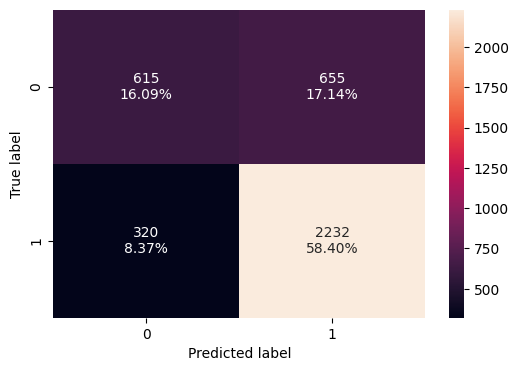

In [78]:
plot_confusion_matrix(gbc,X_test, y_test)

# Hyperparameter Tuning

## AdaBoost Classifier

In [82]:
from sklearn.model_selection import RandomizedSearchCV

# Define the classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# Narrowed parameter grid (same as before)
parameters = {
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
    ],
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.1, 0.5, 1, 1.5],
}

# RandomizedSearchCV (sample 10 random combinations)
random_search = RandomizedSearchCV(
    abc_tuned,
    parameters,
    n_iter=10,  # Number of random samples to evaluate
    scoring="recall",  # Same recall scoring
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all cores
    random_state=42,
    verbose=1,
)

# Fit the random search model
random_search.fit(X_train_sample, y_train_sample)

# Get best model
abc_tuned = random_search.best_estimator_

# Fit the final model with the best parameters
abc_tuned.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 10, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}
Best Recall Score: 0.9349206893716516


In [86]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=model_performance_classification(abc_tuned, X_test, y_test)
abc_tuned_score
print(abc_tuned_score)

   Accuracy    Recall  Precision        F1
0  0.709053  0.933386   0.716606  0.810756


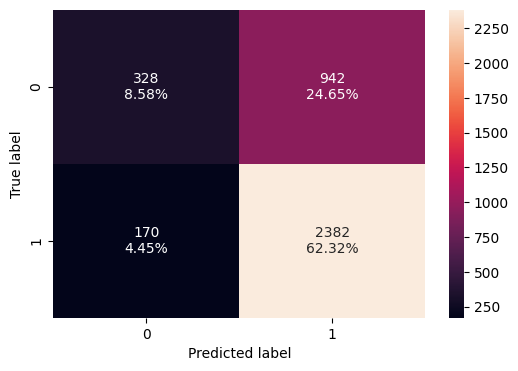

In [87]:
plot_confusion_matrix(abc_tuned,X_test, y_test)

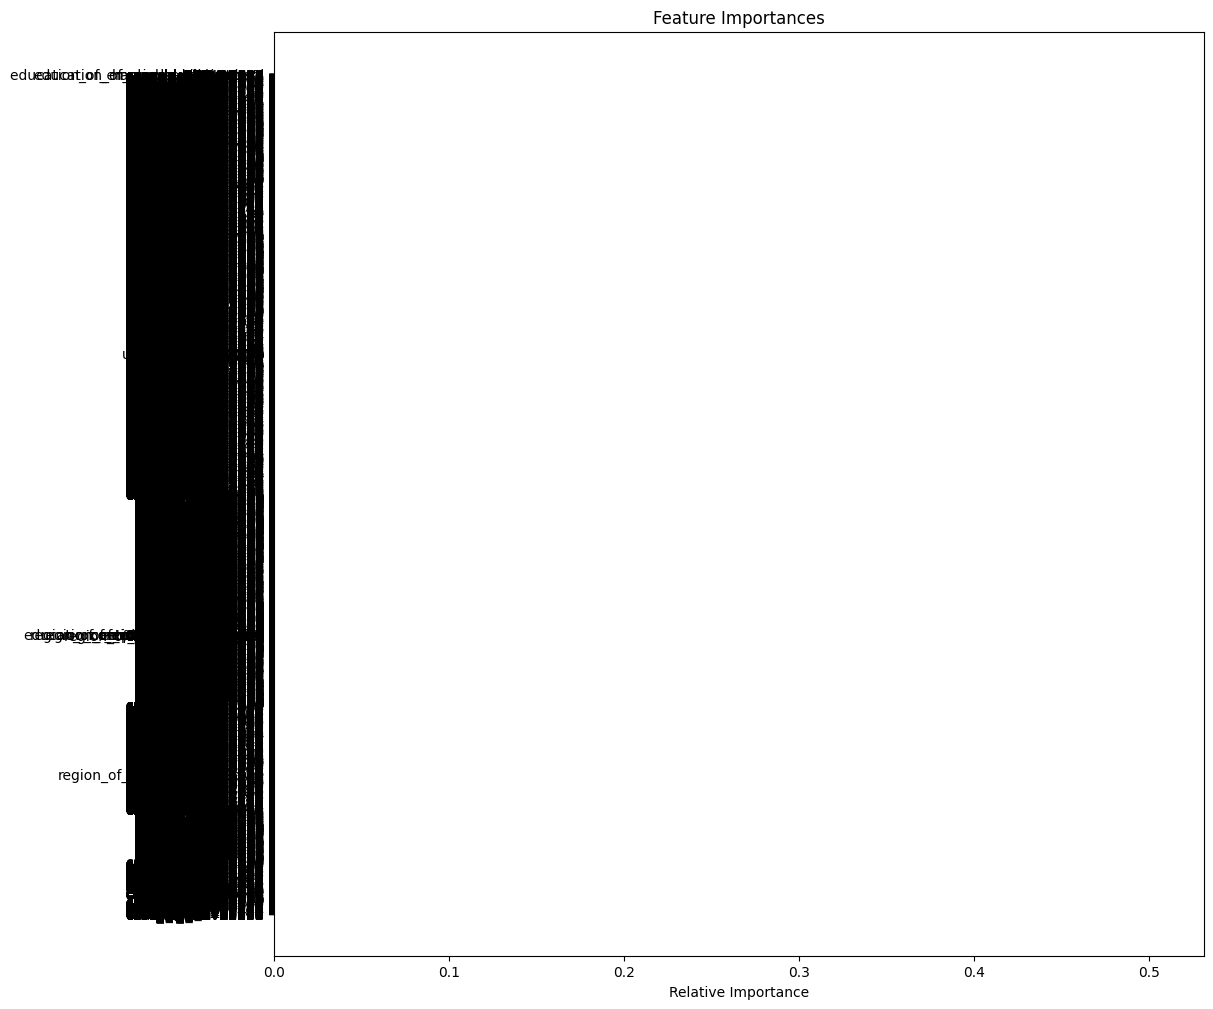

In [88]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Gradient boost classifier

In [89]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [90]:
gbc_init_score=model_performance_classification(gbc_init, X_test, y_test)
print(gbc_init_score)

   Accuracy    Recall  Precision        F1
0  0.744636  0.878527   0.770977  0.821245


In [96]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [10,50],
    "subsample":[0.5,1],
    #"max_features":[0.7,0.8,0.9,1]
}

# RandomizedSearchCV (n_iter controls the number of random combinations)
random_search = RandomizedSearchCV(
    gbc_tuned,
    parameters,
    n_iter=5,  # Number of random combinations to try
    scoring="recall",  # Same recall scoring
    cv=2,
    n_jobs=-1,  # Use all cores for parallelization
    random_state=42,
    verbose=1,
)
# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model
gbc_tuned = random_search.best_estimator_

# Fit the final model with the best parameters
gbc_tuned.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Parameters: {'subsample': 1, 'n_estimators': 10}
Best Recall Score: 0.914043100807635


In [97]:
gbc_tuned_score = model_performance_classification(gbc_tuned, X_test, y_test)
print(gbc_tuned_score)

   Accuracy    Recall  Precision        F1
0  0.733909  0.913009     0.7456  0.820856


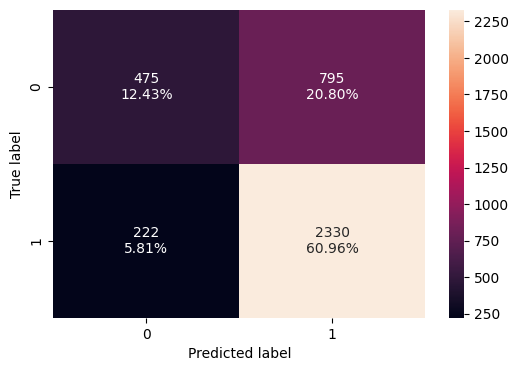

In [98]:
plot_confusion_matrix(gbc_tuned,X_test, y_test)

* Test accuracy and test recall have increased slightly.
* As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [101]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def get_metrics_score(model, flag=True):
    '''
    Function to compute different metrics to check classification model performance

    model: classifier
    flag: If True, the function will print the metrics. If False, it will return the metrics.
    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model on train and test
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)

    #Recall of the model on train and test
    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)

    #Precision of the model on train and test
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is True, print the metrics. If False, return the metrics.
    if flag == True:
        print("Accuracy on training set : ",np.round(train_acc,2))
        print("Accuracy on test set : ",np.round(test_acc,2))
        print("Recall on training set : ",np.round(train_recall,2))
        print("Recall on test set : ",np.round(test_recall,2))
        print("Precision on training set : ",np.round(train_precision,2))
        print("Precision on test set : ",np.round(test_precision,2))
    else:
        return score_list

In [103]:

# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned] # Changed from strings to model objects

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [105]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.74,0.73,0.89,0.89,0.76,0.76
1,AdaBoost Tuned,0.71,0.71,0.93,0.93,0.72,0.72
2,Gradient Boosting with default parameters,0.75,0.74,0.88,0.87,0.78,0.77
3,Gradient Boosting with init=AdaBoost,0.75,0.74,0.88,0.88,0.78,0.77
4,Gradient Boosting Tuned,0.74,0.73,0.91,0.91,0.75,0.75


* The AdaBoost classifier performs well with a strong recall (89%) for both training and testing, indicating it effectively identifies positive cases.

* The tuned AdaBoost classifier achieves the highest recall (93%) compared to the others, both on training and test sets.

* Gradient Boosting with default parameters performs slightly better than AdaBoost in terms of accuracy, precision, and recall. The recall is still high (87%), but it’s slightly lower than AdaBoost's recall.

* gbc_init model has nearly identical performance to the Gradient Boosting with default parameters, with a slight increase in recall on the test set. The precision is similar, and the accuracy is also quite close, indicating this configuration has no major advantage over the default Gradient Boosting.

* gbc_tuned The tuned Gradient Boosting model performs well with high recall (91%), similar to the tuned AdaBoost, but with slightly better precision (75%). It shows balanced performance, with a minimal drop-off in test accuracy compared to training accuracy, suggesting good generalization.

* Best recall is tunes adaboost.

* If minimizing false negatives (e.g., detecting as many positive cases as possible) is the priority, then Tuned AdaBoost should be the preferred choice due to its high recall (93%).

* If minimizing false positives and maintaining a good balance between precision and recall is more important, then Gradient Boosting (either with default parameters or init=AdaBoost) is a better choice with its high precision (77%) and balanced recall (87%-88%).

In [ ]:
-